In [115]:
from sklearn.datasets import load_digits
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
from sklearn import tree
import graphviz 
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold


digits = load_digits()
print(digits.data.shape)


# plt.gray() 
# plt.matshow(digits.images[0]) 
# plt.show() 
print(np.max(digits.images))
print(digits.data.shape)
print(digits.data[0])
print(digits.images.shape)
print(digits.images[0])

(1797, 64)
16.0
(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
(1797, 8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [94]:
n_samples = len(digits.images)
data = digits.data


X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.1, shuffle=False)


In [112]:
clf = LogisticRegressionCV(random_state=0, max_iter=5000).fit(X_train, y_train)

score = clf.score(X_train, y_train)
print("Train Score: ",score)

predict = clf.predict(X_test[:])
# print(predict)

score = clf.score(X_test, y_test)
print("Test Score: ",score)

Train Score:  0.9876314162028448
Test Score:  0.9333333333333333


In [116]:
log_reg = LogisticRegression(random_state=0, max_iter=5000)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(log_reg, X_train, y_train, cv=cv)
print('Cross-Validation Accuracy Scores', scores)


Cross-Validation Accuracy Scores [0.95679012 0.9691358  0.94444444 0.96296296 0.9691358  0.95679012
 0.97530864 0.98136646 1.         0.96273292 0.98148148 0.98765432
 0.96296296 0.97530864 0.97530864 0.98148148 0.94444444 0.95031056
 0.96273292 0.95031056 0.97530864 0.97530864 0.97530864 0.95679012
 0.9691358  0.96296296 0.95679012 0.98757764 0.95031056 0.98757764]


In [129]:
tree_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_impurity_decrease=0.0002)
# tree_clf = tree_clf.fit(X_train, y_train)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(tree_clf, X_train, y_train, cv=cv)
print('Cross-Validation Accuracy Scores', scores)

# print("Depth: ", tree_clf.get_depth())
# print("N Leaves: ", tree_clf.get_n_leaves())

# tree_score = tree_clf.score(X_train, y_train)
# print("Decision Tree Train Score: ",tree_score)

# tree_predict = tree_clf.predict(X_test)
# print(tree_predict)
# tree_score = tree_clf.score(X_test, y_test)
# print("Decision Tree Score: ",tree_score)
# tree.plot_tree(tree_clf, fontsize=10)
# plt.show()

Cross-Validation Accuracy Scores [0.88271605 0.86419753 0.77160494 0.88888889 0.91975309 0.88271605
 0.86419753 0.8757764  0.89440994 0.90062112 0.88888889 0.88271605
 0.90123457 0.93209877 0.85185185 0.91358025 0.83950617 0.85714286
 0.86956522 0.83229814 0.89506173 0.83333333 0.87654321 0.87654321
 0.84567901 0.82098765 0.85185185 0.86335404 0.8136646  0.91304348]


In [97]:
r = export_text(tree_clf)
print(r)

|--- feature_42 <= 7.50
|   |--- feature_26 <= 9.50
|   |   |--- feature_43 <= 2.50
|   |   |   |--- class: 3
|   |   |--- feature_43 >  2.50
|   |   |   |--- class: 2
|   |--- feature_26 >  9.50
|   |   |--- feature_21 <= 5.50
|   |   |   |--- class: 5
|   |   |--- feature_21 >  5.50
|   |   |   |--- class: 9
|--- feature_42 >  7.50
|   |--- feature_38 <= 0.50
|   |   |--- feature_28 <= 4.50
|   |   |   |--- class: 6
|   |   |--- feature_28 >  4.50
|   |   |   |--- class: 8
|   |--- feature_38 >  0.50
|   |   |--- feature_36 <= 1.50
|   |   |   |--- class: 0
|   |   |--- feature_36 >  1.50
|   |   |   |--- class: 6



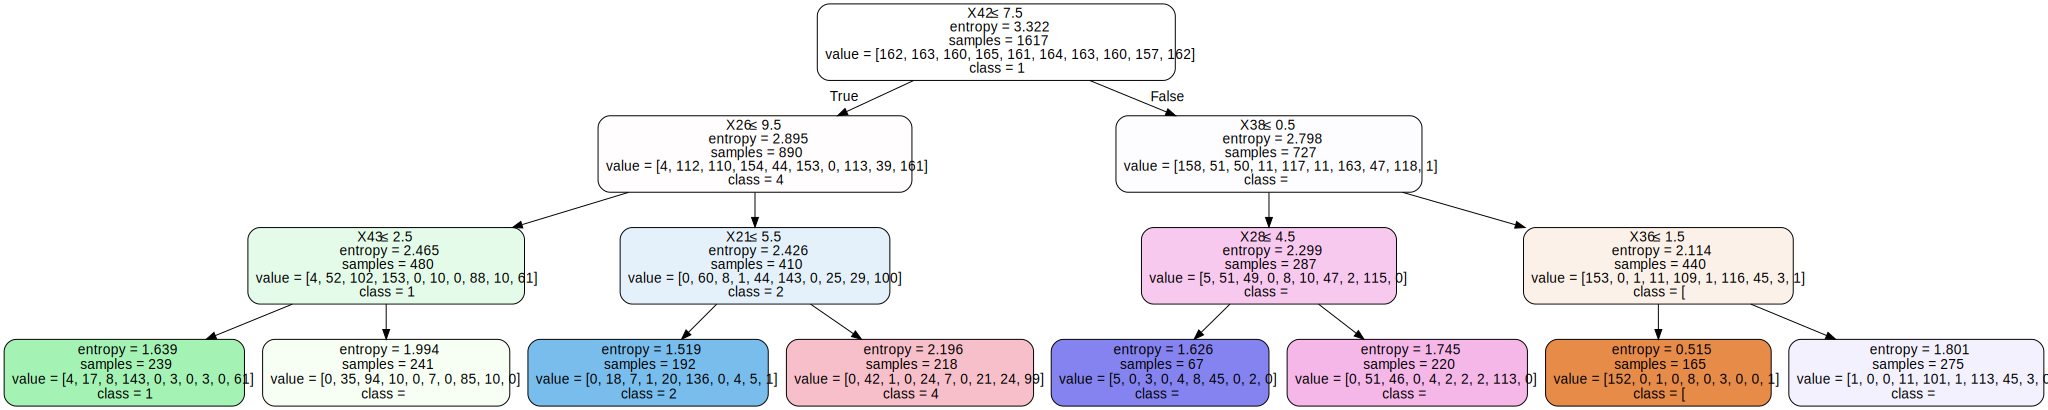

In [98]:
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     class_names=str(digits.target_names),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

In [99]:
def plot_confusionMatrix(cld, X_test, y_test):
    disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
    disp.figure_.suptitle("Confusion Matrix")
    print(f"Confusion matrix:\n{disp.confusion_matrix}")

    plt.show()

In [100]:
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    print(np.min(X), np.max(X))
    print(X)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})


def plot_tsne(X_train):
    X_embedded = TSNE(n_components=2).fit_transform(X_train)
    print(X_embedded)
    print(X_embedded.shape)
    plot_embedding(X_embedded, digits.target, "TSNE dos digitos")
    plt.show()